## Anomaly - basic implementation of Anomaly detection

### We will use "creditcard.csv" dataset, and perform following tasks
1. Inspect and explore data set
    * Inspect Shape of data set 
    * Inspect Missing data in data set
    * Inspect Statistical description of data set
    * Inspect percentage of Fraud and Normal cases in data set
    * Inspect Correlation between features in data set


2. Build and evaluate anomaly model using below algorithms
    * Isolation Forest Algorithm 
    * LocalOutlierFactor Algorithm 


3.  Evaluate performance of above two models

4.  Observation and Suggestions
    

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data set
dataFrame = pd.read_csv('data/creditcard.csv')

### Inspect Shape of data set

In [3]:
#number of rows and columns
dataFrame.shape

(284807, 31)

#### Inspect features columns and target/dependent variable of data set.
Last column "Class" in dataFrame - is target/dependent variable, boolean; True inidcates its "Fraud" and False indicates its "Normal.

In [4]:
dataFrame.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Inspect Missing data in data set

In [5]:
dataFrame.isnull().values.any()

False

##### Data set has no missing data.

### Inspect Statistical description of data set

In [6]:
dataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Inspect percentage of Fraud and Normal cases in data set


% of Fraud (outlier) cases in dataset = 0.1727485630620034



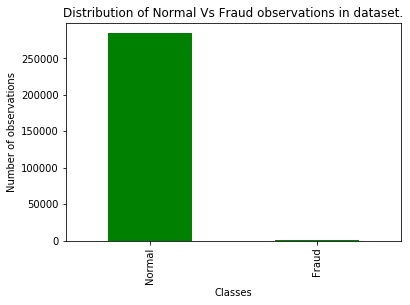

In [7]:
count_by_class = pd.value_counts(dataFrame['Class'], sort = True)

## % of Fraud observations
print("")
print("% of Fraud (outlier) cases in dataset =",(count_by_class[1]/(count_by_class[1]+count_by_class[0])) * 100)
print("")

##Graphical view
count_by_class.plot(kind='bar', color="g")
plt.title("Distribution of Normal Vs Fraud observations in dataset.")
plt.xlabel("Classes")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.ylabel("Number of observations");

Statistics shows "Fraud" class are only 0.17 percent in data set. Hence, data set is highly biased towards "Normal" class, .i.e. "Normal" by far outnumbers "Fraud". This is normal dataset for Anomaly detection cases, .i.e percentage of anomaly will be less than 1%

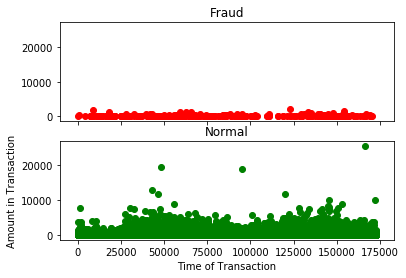

In [8]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
plt.xlabel('Time of Transaction')
plt.ylabel('Amount in Transaction')

fraud_observations = dataFrame[dataFrame['Class']==1]
ax1.scatter(fraud_observations.Time, fraud_observations.Amount, color='r')
ax1.set_title('Fraud')

normal_observations = dataFrame[dataFrame['Class']==0]
ax2.scatter(normal_observations.Time, normal_observations.Amount, color='g')
ax2.set_title('Normal')


plt.show()

**** No  visible pattern between Time, Amount and Fraud

### Inspect Correlation between features in data set

In [9]:
correlation_matrix = dataFrame.corr()
print(correlation_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.12

#### Since number of dimensions are too many, its not easy to read and comprehend correlation. So, lets draw it.

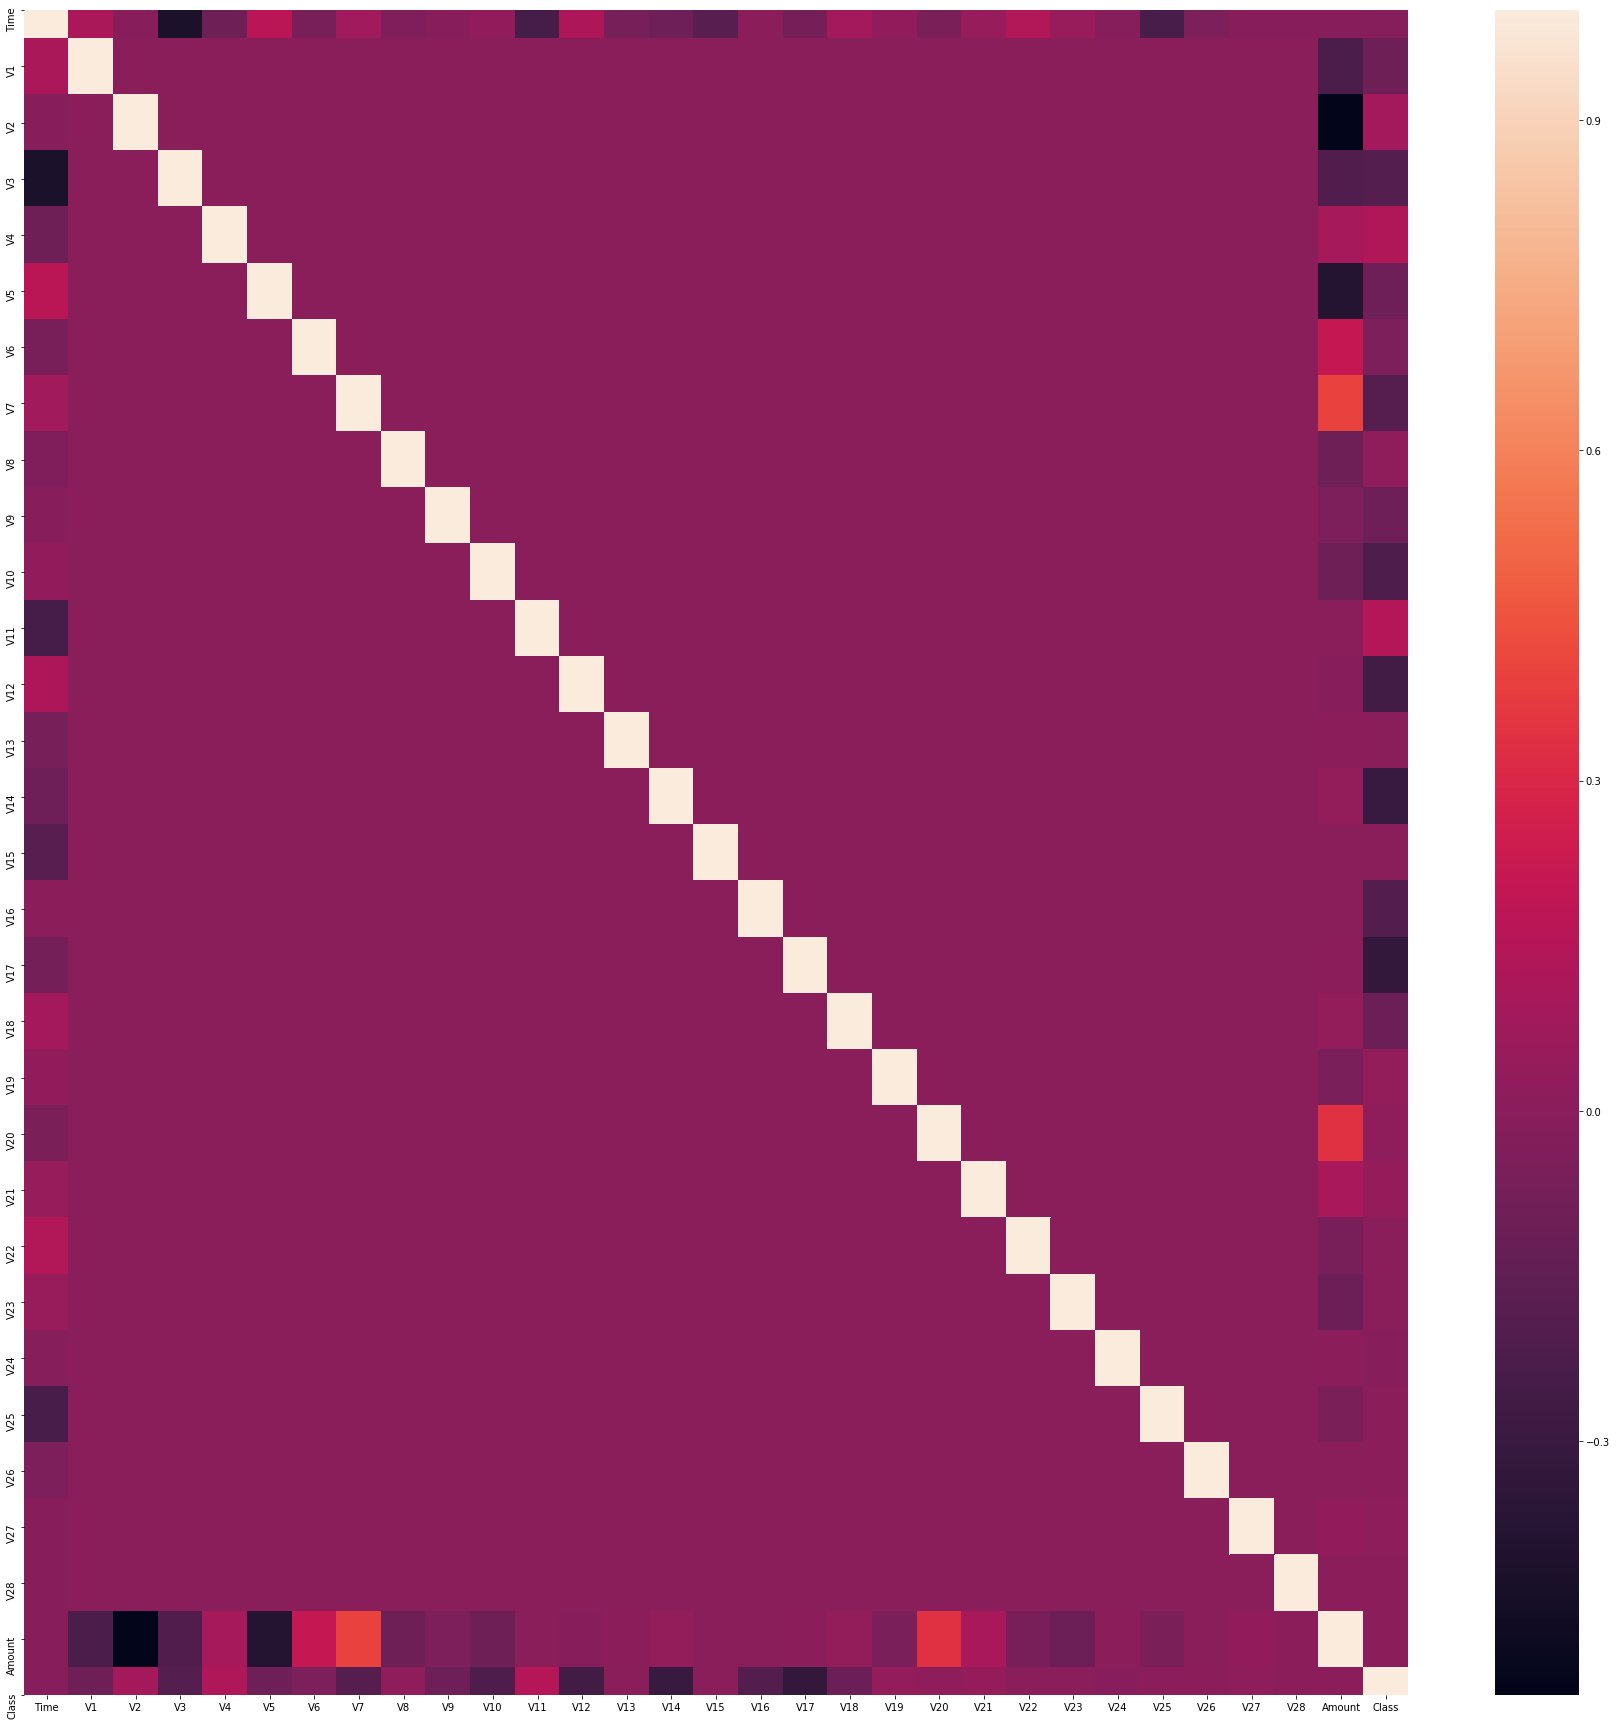

In [10]:
fig = plt.figure(figsize=(31,31))
sns.heatmap(correlation_matrix)
plt.show()

 #### Heat map shows small correlation between Features, not alarming.

### At this stage data looks good and can be used for building initial anomaly model and evaluate/compare mode performance.

### Build and Evaluate model
* Let us split data into training and test set, and use one set for training and other set for evaluation
* We will get started by building model using below algorithms 
        1) Isolation Forest algorithm
        2) LocalOutlierFactor algorithm



#### Split data into training-set and test-set [80 -20 ratio]

In [11]:
from sklearn.model_selection import train_test_split
y = dataFrame['Class']
X = dataFrame.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [12]:
print (" Training data set : ",X_train.shape)
print (" Test data set : ",X_test.shape)
print (" Number of Fraud cases in training set : ",len(y_train[y_train==1]))
print (" Number of Fraud cases in test set : ",len(y_test[y_test==1]))

 Training data set :  (227845, 30)
 Test data set :  (56962, 30)
 Number of Fraud cases in training set :  398
 Number of Fraud cases in test set :  94


### 1) Isolation Forest algorithm

In [13]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest

fraud_fraction = len(y_train[y_train==1])/float(len(y_train[y_train==0]))
number_of_train_samples=len(X_train)

# fit the model
clf=IsolationForest(n_estimators=100, max_samples=number_of_train_samples,contamination=fraud_fraction,random_state=None, verbose=0)
clf.fit(X_train)

#predict on training set
y_pred_train = clf.predict(X_train)

#predict on test set
y_pred_test = clf.predict(X_test)

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1


print("-----------------------------------------------------------")
print(" Score on Test set")
print(" Error count : ",(y_test!=y_pred_test).sum())
print(" Accuracy Score:")
print(accuracy_score(y_test,y_pred_test))
print(" Classification Report:")
print(classification_report(y_test,y_pred_test))

print("-----------------------------------------------------------")
print(" Score on training set")
print(" Error count : ",(y_train != y_pred_train).sum())
print(" Accuracy Score:")
print(accuracy_score(y_train,y_pred_train))
print(" Classification Report:")
print(classification_report(y_train,y_pred_train))

D:\software\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\software\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\software\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


-----------------------------------------------------------
 Score on Test set
 Error count :  153
 Accuracy Score:
0.9973139988062217
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.23      0.27      0.25        94

    accuracy                           1.00     56962
   macro avg       0.61      0.63      0.62     56962
weighted avg       1.00      1.00      1.00     56962

-----------------------------------------------------------
 Score on training set
 Error count :  539
 Accuracy Score:
0.9976343566898549
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.32      0.32      0.32       398

    accuracy                           1.00    227845
   macro avg       0.66      0.66      0.66    227845
weighted avg       1.00      1.00      1.00    227845



### 2) LocalOutlierFactor algorithm

In [14]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor

fraud_fraction = len(y_train[y_train==1])/float(len(y_train[y_train==0]))
number_of_train_samples=len(X_train)

# fit the model
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=fraud_fraction)
clf.fit(X_train)


#predict on training set
y_pred_train = clf.fit_predict(X_train)

#predict on test set
y_pred_test = clf.fit_predict(X_test)


#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1


print("-----------------------------------------------------------")
print(" Score on Test set")
print(" Error count : ",(y_test!=y_pred_test).sum())
print(" Accuracy Score:")
print(accuracy_score(y_test,y_pred_test))
print(" Classification Report:")
print(classification_report(y_test,y_pred_test))

print("-----------------------------------------------------------")
print(" Score on training set")
print(" Error count : ",(y_train != y_pred_train).sum())
print(" Accuracy Score:")
print(accuracy_score(y_train,y_pred_train))
print(" Classification Report:")
print(classification_report(y_train,y_pred_train))

-----------------------------------------------------------
 Score on Test set
 Error count :  194
 Accuracy Score:
0.9965942207085425
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.00      0.00      0.00        94

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

-----------------------------------------------------------
 Score on training set
 Error count :  759
 Accuracy Score:
0.9966687879918366
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.05      0.05      0.05       398

    accuracy                           1.00    227845
   macro avg       0.52      0.52      0.52    227845
weighted avg       1.00      1.00      1.00    227845



### Observations
 - Isolation Forest has slightly better accuracy compared to LocalOutlierFactor
 - Isolation Forest has lesser number of error counts compared to LocalOutlierFactor
 
Overall, Isolation Forest appears to be better choice. However, deep learning approach may outperform Isolation Forest but it will require higher compute power, training time  and larger data-set.

